In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
sns.set(style="whitegrid")


In [10]:
df = pd.read_csv("ecommerce_sales_sample.csv")



In [12]:
print("First 5 rows:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

First 5 rows:
  Order_ID  Order_Date Customer_ID Customer_Name Product_ID Product_Name  \
0  ORD1000  2025-12-17     CUST119   Customer_38      PROD2   Product_20   
1  ORD1001  2025-07-04     CUST121   Customer_61      PROD9   Product_22   
2  ORD1002  2025-04-08     CUST130   Customer_38     PROD46    Product_3   
3  ORD1003  2025-08-15     CUST165   Customer_78     PROD24   Product_20   
4  ORD1004  2025-04-09     CUST137   Customer_46      PROD9   Product_17   

         Category Subcategory  Quantity    Price  Total_Sale Payment_Method  \
0         Apparel     Subcat3         1  1424.74     1424.74     Debit Card   
1           Books     Subcat1         1   931.26      931.26    Credit Card   
2     Electronics     Subcat3         3   760.27     2280.81     Debit Card   
3          Beauty     Subcat2         1  1442.04     1442.04    Net Banking   
4  Home & Kitchen     Subcat2         1  1291.64     1291.64            COD   

        City  
0      Delhi  
1  Bangalore  
2  Bangal

In [13]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Order_ID          0
Order_Date        0
Customer_ID       0
Customer_Name     0
Product_ID        0
Product_Name      0
Category          0
Subcategory       0
Quantity          0
Price             0
Total_Sale        0
Payment_Method    0
City              0
dtype: int64


In [14]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
df = df.drop_duplicates()


Duplicate rows: 0


In [16]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [17]:
total_sales = df['Total_Sale'].sum()
print(f"Total Sales: ₹{total_sales}")

Total Sales: ₹560511.46


In [18]:
category_sales = df.groupby('Category')['Total_Sale'].sum().sort_values(ascending=False)
print("\nSales by Category:")
print(category_sales)


Sales by Category:
Category
Electronics       154386.08
Books             127174.65
Home & Kitchen     97730.87
Apparel            97304.24
Beauty             83915.62
Name: Total_Sale, dtype: float64


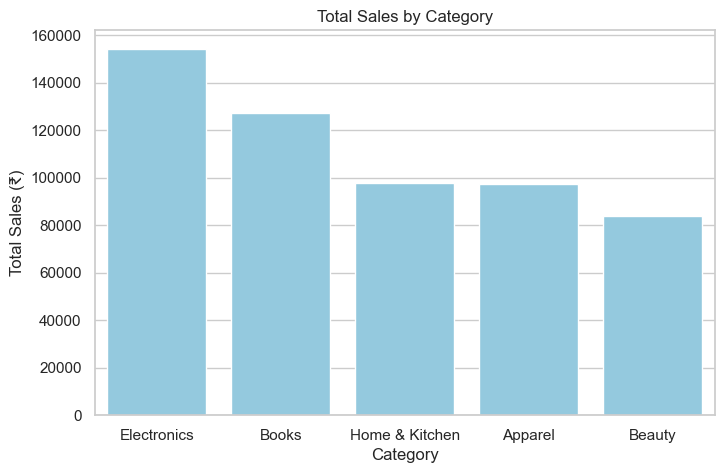

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, color="skyblue")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Category")
plt.show()

In [20]:
top_products = df.groupby('Product_Name')['Total_Sale'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:")
print(top_products)

Top 10 Products by Sales:
Product_Name
Product_26    24503.77
Product_27    22241.81
Product_45    21685.86
Product_32    21626.62
Product_8     20351.45
Product_16    19658.27
Product_2     18946.39
Product_47    18573.45
Product_29    18444.83
Product_15    16969.23
Name: Total_Sale, dtype: float64


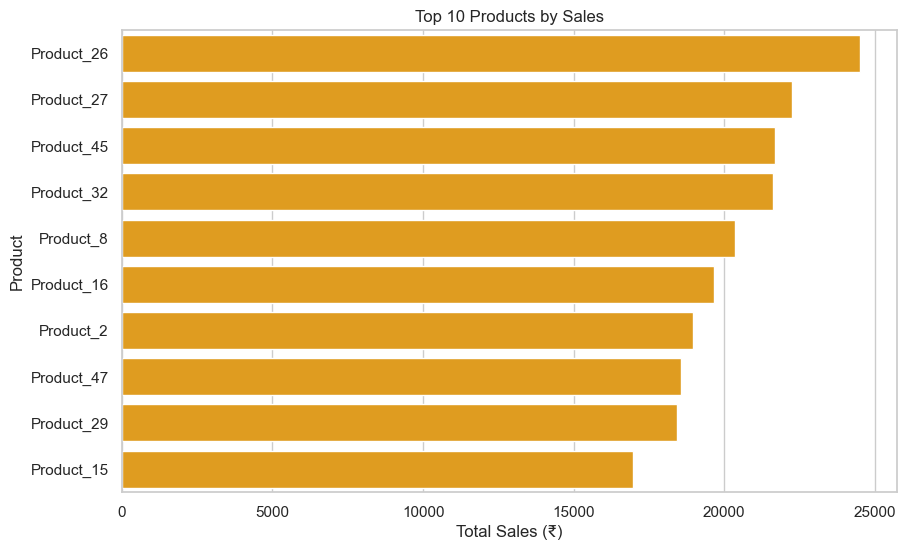

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, color="orange")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Product")
plt.show()

In [22]:
df['Month'] = df['Order_Date'].dt.to_period('M')

In [23]:
monthly_sales = df.groupby('Month')['Total_Sale'].sum()

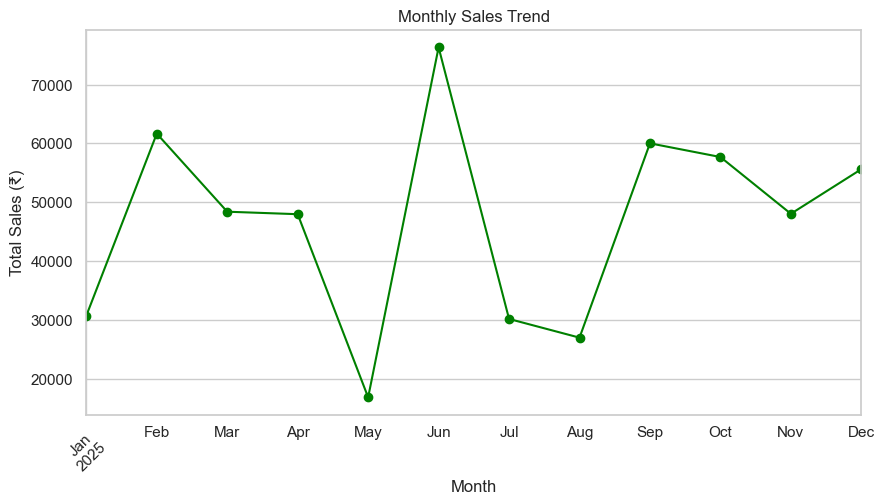

In [24]:
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Sales by City:
City
Delhi        136119.34
Pune         124344.90
Mumbai       115162.46
Bangalore     98501.34
Hyderabad     86383.42
Name: Total_Sale, dtype: float64


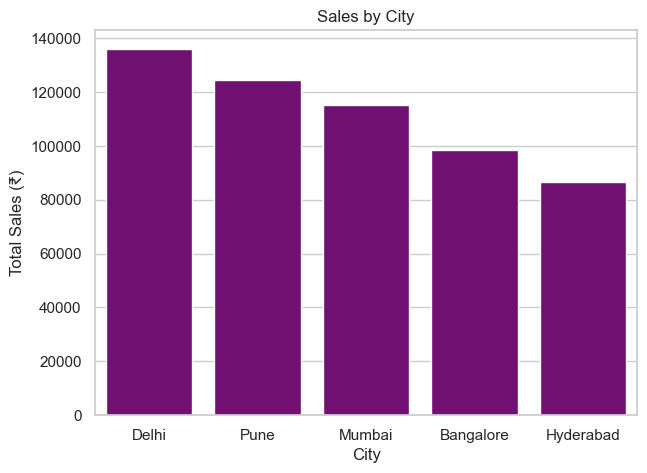

In [25]:
# Sales by City
city_sales = df.groupby('City')['Total_Sale'].sum().sort_values(ascending=False)
print("\nSales by City:")
print(city_sales)

# Plot City Sales
plt.figure(figsize=(7,5))
sns.barplot(x=city_sales.index, y=city_sales.values, color="purple")
plt.title("Sales by City")
plt.ylabel("Total Sales (₹)")
plt.xlabel("City")
plt.show()



Sales by Payment Method:
Payment_Method
COD             71539.07
Credit Card    123679.70
Debit Card     142518.63
Net Banking    104075.66
UPI            118698.40
Name: Total_Sale, dtype: float64


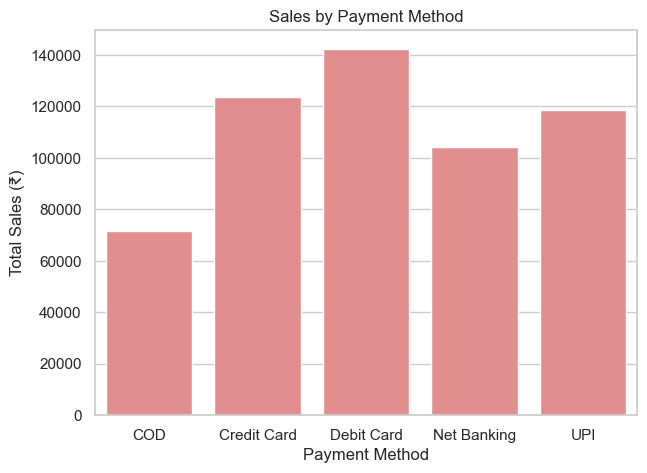

In [26]:
# Sales by Payment Method
payment_sales = df.groupby('Payment_Method')['Total_Sale'].sum()
print("\nSales by Payment Method:")
print(payment_sales)

# Plot Payment Methods
plt.figure(figsize=(7,5))
sns.barplot(x=payment_sales.index, y=payment_sales.values, color="lightcoral")
plt.title("Sales by Payment Method")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Payment Method")
plt.show()


In [27]:
# Number of orders per customer
customer_orders = df.groupby('Customer_ID')['Order_ID'].count().sort_values(ascending=False)
print("\nTop Customers by Number of Orders:")
print(customer_orders.head(10))

# Total spending per customer
customer_sales = df.groupby('Customer_ID')['Total_Sale'].sum().sort_values(ascending=False)
print("\nTop Customers by Total Spending:")
print(customer_sales.head(10))



Top Customers by Number of Orders:
Customer_ID
CUST188    6
CUST151    5
CUST114    5
CUST181    5
CUST128    4
CUST117    4
CUST158    4
CUST143    4
CUST137    4
CUST157    4
Name: Order_ID, dtype: int64

Top Customers by Total Spending:
Customer_ID
CUST188    26433.22
CUST151    19106.36
CUST197    16222.92
CUST114    15611.23
CUST137    15556.84
CUST136    14936.01
CUST135    14312.31
CUST196    14058.72
CUST177    13507.31
CUST115    12937.22
Name: Total_Sale, dtype: float64


In [30]:
# Prepare data for linear regression
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['Month_Num'] = range(1, len(monthly_sales_df)+1)

X = monthly_sales_df[['Month_Num']]  # DataFrame
y = monthly_sales_df['Total_Sale']

# Train linear regression
model = LinearRegression()
model.fit(X, y)

# Predict next month
next_month = pd.DataFrame({'Month_Num': [len(X)+1]})  # Keep same column name as X
predicted_sales = model.predict(next_month)
print(f"\nPredicted Sales for next month: ₹{predicted_sales[0]:.2f}")



Predicted Sales for next month: ₹52633.53


In [29]:
print("\n--- Key Insights ---")
print("1. Highest sales category:", category_sales.idxmax())
print("2. Top selling product:", top_products.idxmax())
print("3. City generating most revenue:", city_sales.idxmax())
print("4. Most preferred payment method:", payment_sales.idxmax())
print("5. Customer with highest spending:", customer_sales.idxmax())



--- Key Insights ---
1. Highest sales category: Electronics
2. Top selling product: Product_26
3. City generating most revenue: Delhi
4. Most preferred payment method: Debit Card
5. Customer with highest spending: CUST188
